<a href="https://colab.research.google.com/github/JacobItopa/cluster_analysis/blob/main/clusterring_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering

## Key Components of Cluster Analysis

* Distance/similarity/dissimilarity function
* Loss function to evaluate clusters
* Algorithm to optimize loss function
* Goal:  Find natural groupings in data
  * Form of unsupervised learning
  * Often the "correct" groupings are unknown
  * Samples within a group should be more similar than samples in different groups

## Distance Metrics

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/55/Euclidean_distance_2d.svg/2880px-Euclidean_distance_2d.svg.png" width="400">

Distance metrics (Hamming, Euclidean, Cosine, Mahalanobis)

In [1]:
import pandas as pd
team_data = "https://raw.githubusercontent.com/noahgift/socialpowernba/master/data/nba_2017_att_val_elo_win_housing.csv"
val_housing_win_df = pd.read_csv(team_data)
numerical_df = val_housing_win_df.loc[:,["TOTAL_ATTENDANCE_MILLIONS", "ELO", "VALUE_MILLIONS", "MEDIAN_HOME_PRICE_COUNTY_MILLIONS"]]
numerical_df.head()

,TOTAL_ATTENDANCE_MILLIONS,ELO,VALUE_MILLIONS,MEDIAN_HOME_PRICE_COUNTY_MILLIONS
0,0.888882,1519,2500,269900.0
1,0.811366,1420,1450,314990.0
2,0.721928,1393,1075,343950.0
3,0.805400,1569,1350,389000.0
4,0.813050,1600,1125,390000.0


Write your own function to find Euclidian Distance

In [2]:
from sklearn.metrics.pairwise import euclidean_distances
import numpy as np
from sklearn.preprocessing import StandardScaler
np.set_printoptions(suppress=True)

def twod(row):
  """Grab row, scale, reshape to 2D Array"""

  raw_row = np.array(row.values.tolist())
  res = raw_row.reshape(-1,1)
  scaler = StandardScaler()
  scaler.fit(res)
  val = scaler.transform(res)
  return val

# Grab row 1 and row 2
first_row = twod(numerical_df.iloc[0])
second_row = twod(numerical_df.iloc[1])

# Get euclidean distance between row 1 and row two in multi-dimensional space
euclidean_distances(first_row,second_row)

array([[0.00447177, 0.01490839, 0.01512901, 2.32088272],
       [0.00858239, 0.00185424, 0.00207486, 2.30782856],
       [0.01701795, 0.00658133, 0.00636071, 2.299393  ],
       [2.31637625, 2.30593962, 2.30571901, 0.0000347 ]])

## Standardization

* helps clusters be equally influenced by each feature/dimension
* Z-score standardization (i.e standard score):  subtract mean and divide by standard deviation
* Done with [preprocessing in sklearn](https://scikit-learn.org/stable/modules/preprocessing.html)
* Recommended to [also use Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html#sklearn.pipeline.make_pipeline)

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans

Load Data Set (*different units!*)

In [4]:
import pandas as pd
team_data = "https://raw.githubusercontent.com/noahgift/socialpowernba/master/data/nba_2017_att_val_elo_win_housing.csv"
val_housing_win_df = pd.read_csv(team_data)
numerical_df = val_housing_win_df.loc[:,["TOTAL_ATTENDANCE_MILLIONS", "ELO", "VALUE_MILLIONS", "MEDIAN_HOME_PRICE_COUNTY_MILLIONS"]]
numerical_df.head()

,TOTAL_ATTENDANCE_MILLIONS,ELO,VALUE_MILLIONS,MEDIAN_HOME_PRICE_COUNTY_MILLIONS
0,0.888882,1519,2500,269900.0
1,0.811366,1420,1450,314990.0
2,0.721928,1393,1075,343950.0
3,0.805400,1569,1350,389000.0
4,0.813050,1600,1125,390000.0


Use Sklearn Pipeline

* [reference](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html#sphx-glr-auto-examples-preprocessing-plot-scaling-importance-py)


In [5]:
%%timeit
# Fit to data and predict using pipelined scaling, KMeans.
std_clf = make_pipeline(StandardScaler(), KMeans(n_clusters=3))
kmeans = std_clf.fit(numerical_df)

5.52 ms ± 650 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Without Sklearn Pipeline (more lines of code)

In [6]:
%%timeit
k_means2 = KMeans(n_clusters=3)
scaler = StandardScaler()
scaler.fit(numerical_df)
kmeans2_result = k_means2.fit(scaler.transform(numerical_df))

4.02 ms ± 668 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


## K-means

### K-means Diagnostics

* Elbow Plot
* Silhouettee Analysis
* Intercluster Distance Map

#### K-means Elbow Plot

##### Yellowbrick Elbow Plot

http://www.scikit-yb.org/en/latest/api/cluster/elbow.html

...implements the **“elbow” method** to help data scientists select the optimal number of clusters by fitting the model with a range of values for K. If the line **chart resembles an arm, then the “elbow” (the point of inflection on the curve) is a good indication** that the underlying model fits best at that point.

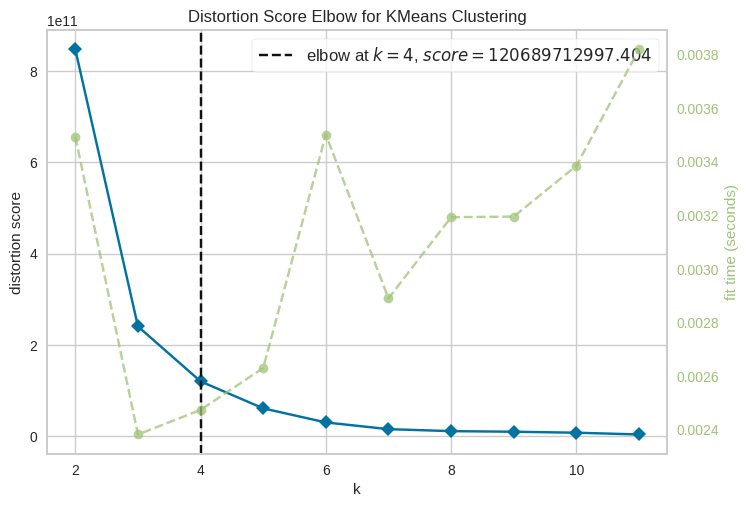

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [7]:
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,12))
visualizer.fit(numerical_df)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data

Scaled Version

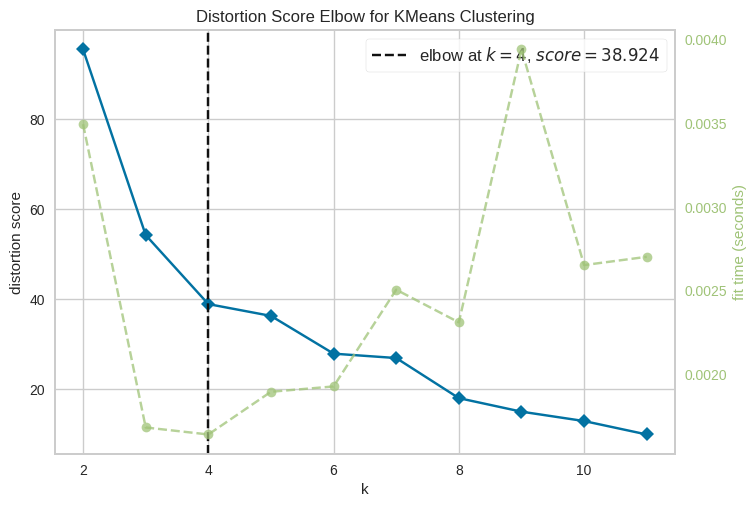

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [8]:
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()
scaler = StandardScaler()
scaler.fit(numerical_df)
visualizer = KElbowVisualizer(model, k=(2,12))
# Fit the SCALED data to the visualizer
visualizer.fit(scaler.transform(numerical_df))
visualizer.poof()    # Draw/show/poof the data

##### "From Scratch" Elbow Plot

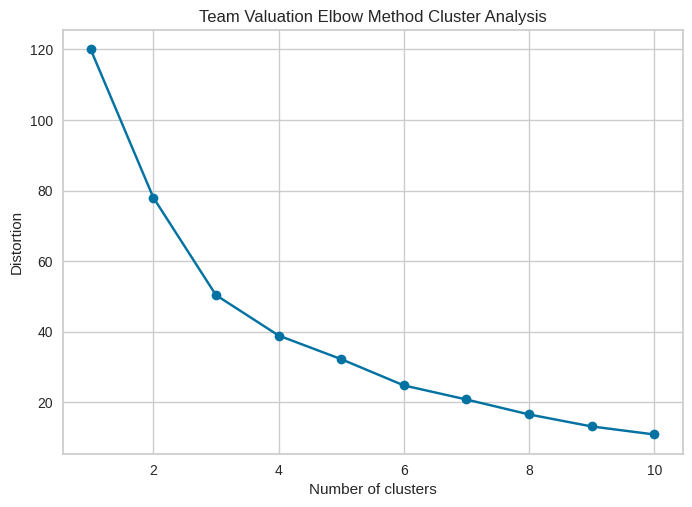

In [9]:
import matplotlib.pyplot as plt

distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i,
            init='k-means++',
            n_init=10,
            max_iter=300,
            random_state=0)
    km.fit(scaler.transform(numerical_df))
    distortions.append(km.inertia_)

plt.plot(range(1,11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title("Team Valuation Elbow Method Cluster Analysis")
plt.show()

##### Reference Yellowbrick Elbow Plot

In [10]:
from sklearn.datasets import make_blobs

# Create synthetic dataset with 8 random clusters
X, y = make_blobs(centers=8, n_features=12, shuffle=True, random_state=42)

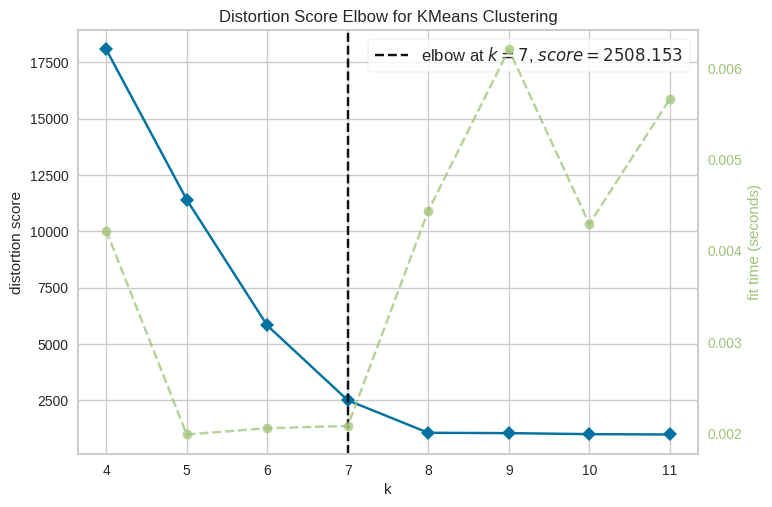

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [11]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,12))

visualizer.fit(X)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data

#### K-means Silhouettee Analysis

##### Yellowbrick Silhouette Visualizer-NBA Teams

http://www.scikit-yb.org/en/latest/api/cluster/silhouette.html

The Silhouette Visualizer **displays the silhouette coefficient** for each sample on a per-cluster basis, visualizing which clusters are dense and which are not. This is particularly useful for **determining cluster imbalance**, or for **selecting a value for K by comparing multiple visualizers**.

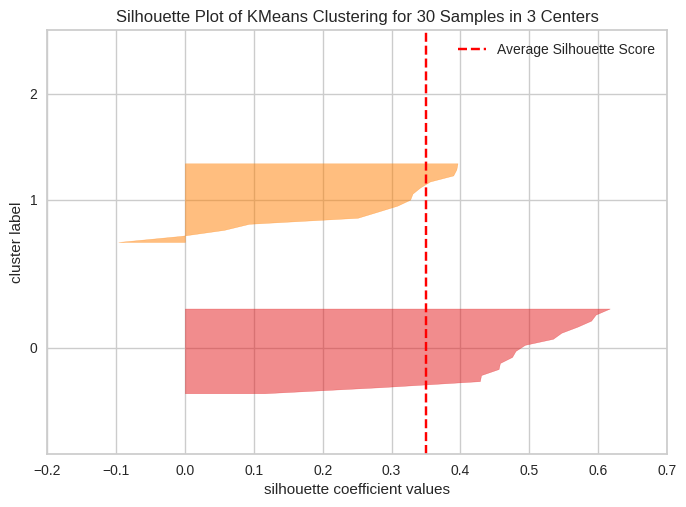

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 30 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [12]:
from yellowbrick.cluster import SilhouetteVisualizer

# Instantiate the clustering model and visualizer
visualizer = SilhouetteVisualizer(KMeans(3))

visualizer.fit(scaler.transform(numerical_df)) # Fit the training data to the visualizer
visualizer.poof() # Draw/show/poof the data

##### "From Scratch" Silhouette Plot

In [13]:
km = KMeans(n_clusters=3,
            init='k-means++',
            n_init=10,
            max_iter=300,
            random_state=0)
y_km = km.fit_predict(scaler.transform(numerical_df))

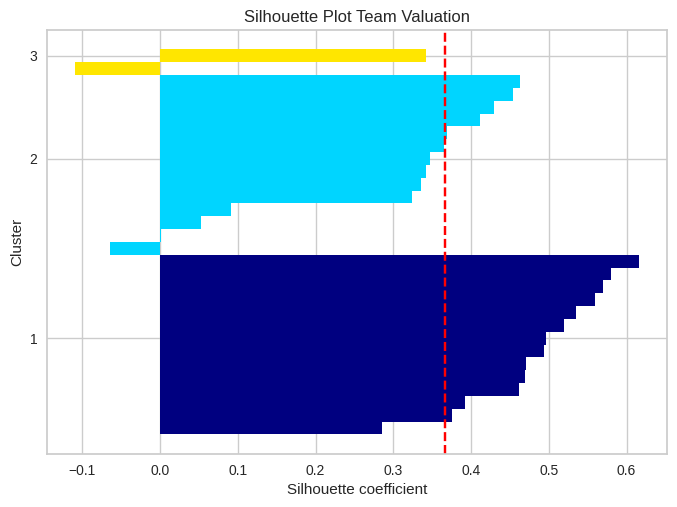

<Figure size 2000x1000 with 0 Axes>

In [14]:
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(scaler.transform(numerical_df),
                                     y_km,
                                     metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i)/n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none',color=color)
    yticks.append((y_ax_lower + y_ax_upper)/2)
    y_ax_lower += len(c_silhouette_vals)
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg,
            color="red",
            linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.title('Silhouette Plot Team Valuation')
plt.figure(figsize=(20,10))
plt.show()

##### Yellowbrick Silhouette Visualizer-reference plot

In [15]:
from sklearn.datasets import make_blobs

# Make 8 blobs dataset
X, y = make_blobs(centers=8)

Incorrect cluster selection

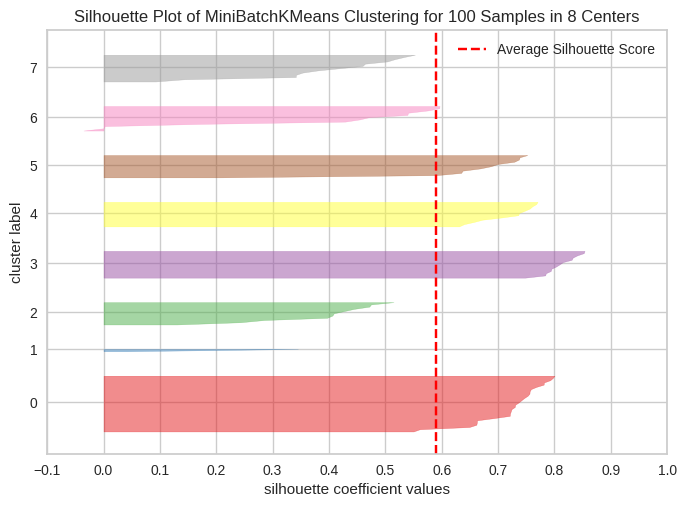

<Axes: title={'center': 'Silhouette Plot of MiniBatchKMeans Clustering for 100 Samples in 8 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [16]:
from sklearn.cluster import MiniBatchKMeans

from yellowbrick.cluster import SilhouetteVisualizer

# Instantiate the clustering model and visualizer
model = MiniBatchKMeans(8)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(X) # Fit the training data to the visualizer
visualizer.poof() # Draw/show/poof the data

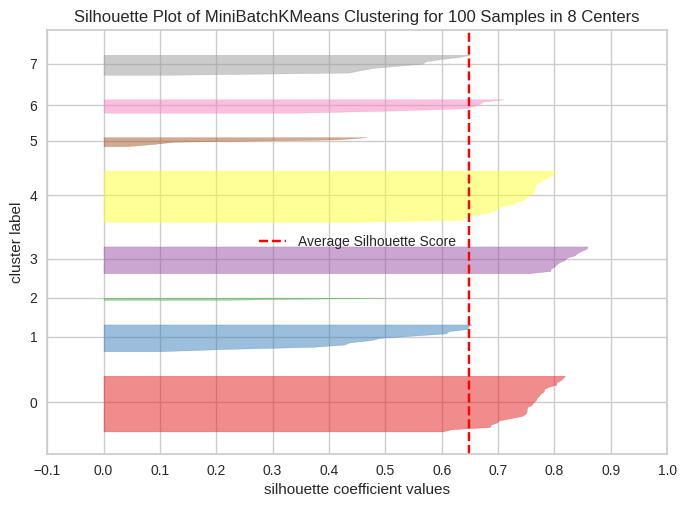

<Axes: title={'center': 'Silhouette Plot of MiniBatchKMeans Clustering for 100 Samples in 8 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [17]:
from sklearn.cluster import MiniBatchKMeans

from yellowbrick.cluster import SilhouetteVisualizer

# Instantiate the clustering model and visualizer
model = MiniBatchKMeans(8)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(X) # Fit the training data to the visualizer
visualizer.poof() # Draw/show/poof the data

#### K-Means Intercluster Distance Maps

##### Yellowbrick Intercluster Distance Maps-NBA Teams

http://www.scikit-yb.org/en/latest/api/cluster/icdm.html

Intercluster distance maps display an embedding of the cluster centers in 2 dimensions with the distance to other centers preserved.

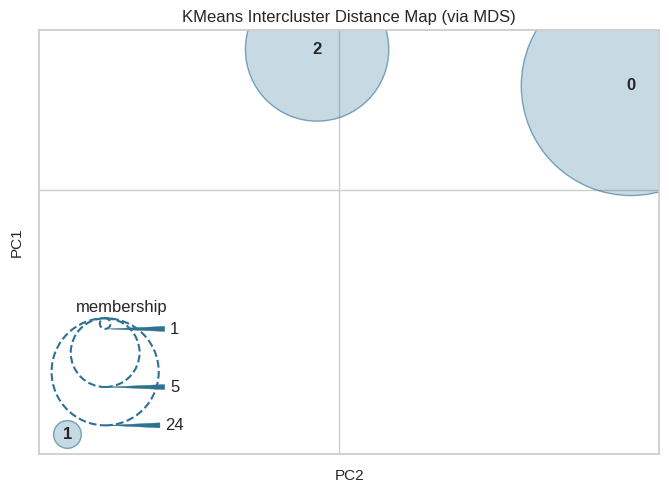

<Axes: title={'center': 'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [18]:
from yellowbrick.cluster import InterclusterDistance

# Instantiate the clustering model and visualizer
visualizer = InterclusterDistance(KMeans(3))

visualizer.fit(scaler.transform(numerical_df)) # Fit the training data to the visualizer
visualizer.poof() # Draw/show/poof the data

##### Yellowbrick Intercluster Distance Maps-reference plot

In [19]:
from sklearn.datasets import make_blobs

# Make 12 blobs dataset
X, y = make_blobs(centers=8, n_samples=1000, n_features=16, shuffle=True)

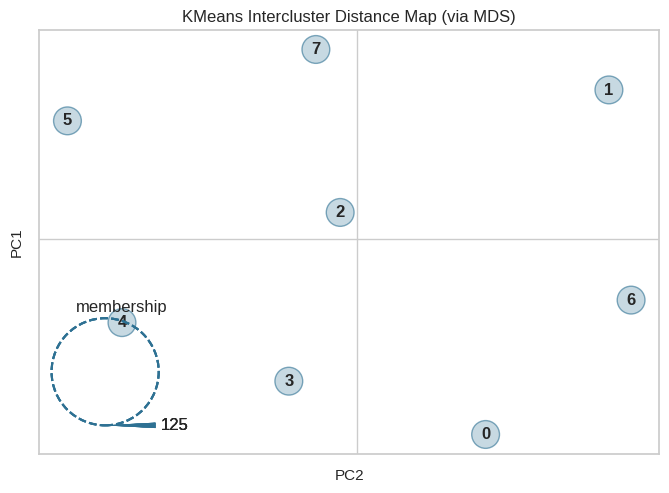

<Axes: title={'center': 'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [20]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import InterclusterDistance

# Instantiate the clustering model and visualizer
visualizer = InterclusterDistance(KMeans(8))

visualizer.fit(X) # Fit the training data to the visualizer
visualizer.poof() # Draw/show/poof the data

###Real-World K-means Computational Challenges



*   Will Perform Differently on Multi-core machines
*   Disk I/O becomes a factor as well as CPU



#### Serial 25 K-means Clustering Operations

In [21]:
%%time
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import time

def do_kmeans():
    """KMeans clustering on generated data"""

    X,_ = make_blobs(n_samples=100000, centers=3, n_features=10,
                random_state=0)
    kmeans = KMeans(n_clusters=3)
    t0 = time.time()
    kmeans.fit(X)
    print(f"KMeans cluster fit in {time.time()-t0}")

def run_serial():
    """Run Everything"""

    count = 25
    t0 = time.time()
    for _ in range(count):
        do_kmeans()

run_serial()

KMeans cluster fit in 0.07529973983764648
KMeans cluster fit in 0.1481950283050537
KMeans cluster fit in 0.25269269943237305
KMeans cluster fit in 0.26356053352355957
KMeans cluster fit in 0.18159174919128418
KMeans cluster fit in 0.2156074047088623
KMeans cluster fit in 0.19484424591064453
KMeans cluster fit in 0.25771188735961914
KMeans cluster fit in 0.09535861015319824
KMeans cluster fit in 0.10178685188293457
KMeans cluster fit in 0.1119694709777832
KMeans cluster fit in 0.16127228736877441
KMeans cluster fit in 0.14292097091674805
KMeans cluster fit in 0.14455080032348633
KMeans cluster fit in 0.10004019737243652
KMeans cluster fit in 0.12010002136230469
KMeans cluster fit in 0.12413358688354492
KMeans cluster fit in 0.12307858467102051
KMeans cluster fit in 0.06414651870727539
KMeans cluster fit in 0.061519622802734375
KMeans cluster fit in 0.06313633918762207
KMeans cluster fit in 0.06149888038635254
KMeans cluster fit in 0.061058759689331055
KMeans cluster fit in 0.06320977210

#### Parallel 25 K-means Clustering Operations with Multiprocessing Module

In [22]:
import multiprocessing

multiprocessing.cpu_count()

2

In [23]:
%%time
from multiprocessing import Pool
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import time

def do_kmeans(n_samples):
    """KMeans clustering on generated data"""

    X,_ = make_blobs(n_samples, centers=3, n_features=10,
                random_state=0)
    kmeans = KMeans(n_clusters=3)
    t0 = time.time()
    kmeans.fit(X)
    print(f"KMeans cluster fit in {time.time()-t0}")

def run_parallel():
    """Run Everything"""

    count = 25
    t0 = time.time()
    with Pool(10) as p:
        p.map(do_kmeans, [100000 for x in range(count)])
    print(f"Performed {count} KMeans in total time: {time.time()-t0}")

run_parallel()

KMeans cluster fit in 0.6679177284240723KMeans cluster fit in 0.6421384811401367

KMeans cluster fit in 0.682440996170044
KMeans cluster fit in 0.6602194309234619
KMeans cluster fit in 0.7113604545593262KMeans cluster fit in 0.7352981567382812
KMeans cluster fit in 0.7348694801330566KMeans cluster fit in 0.7010233402252197


KMeans cluster fit in 0.7458491325378418
KMeans cluster fit in 0.7792439460754395
KMeans cluster fit in 0.4741477966308594
KMeans cluster fit in 0.5782561302185059
KMeans cluster fit in 0.5351715087890625KMeans cluster fit in 0.6738436222076416

KMeans cluster fit in 0.5903830528259277
KMeans cluster fit in 0.6141166687011719
KMeans cluster fit in 0.5950632095336914
KMeans cluster fit in 0.6826939582824707
KMeans cluster fit in 0.6799404621124268KMeans cluster fit in 0.6796488761901855

KMeans cluster fit in 0.27345919609069824
KMeans cluster fit in 0.3165452480316162KMeans cluster fit in 0.28443026542663574

KMeans cluster fit in 0.34056615829467773
KMeans cluster

#### Other ways to run parallel K-Means jobs?


* AWS Sagemaker (Auto-Hyper Parameters)
* AWS Batch
* AWS EMR/Spark
* AWS Deep Learning Spot Instances

#### Demo Parallel K-means in Cloud9

Parallel K-means code here: https://github.com/noahgift/machine_learning_fundamentals

### Writing K-means from scratch